# Exploratory Data Analysis on Google Play Store Apps 

![Play Store](https://i.imgur.com/5TFmHcV.png)

### INTRODUCTION

In this project, we will analyze the Google Playstore Apps Dataset from Kaggle. This dataset has over 4.5 Lakhs of rows and 29 columns. We'll use the useful 16 columns for our Analysis. The data set can be viewed using this link: 'https://www.kaggle.com/datasets/geothomas/playstore-dataset?resource=download&select=Playstore_final.csv'

The main objective of this project is to Analyse each column in the Google Play Store dataset by applying data analysis & visualization skills to the real-world dataset.

### OUTLINE
**Here is an outline of the steps we'll follow:**

1.  Downloading a dataset from an online source.
2.  Data preparation and cleaning
3.  Exploratory Analysis and Visualization.
4.  Asking and Answering interesting questions.
5.  Summary
6.  Future Work
7.  Reference

**Exploratory Data Analysis (EDA)** is a process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understand data by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand, it requires knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.


![EDA](https://i.imgur.com/FT73bKp.png)

### __1. DOWNLOADING DATASET FROM AN ONLINE SOURCE__

### Installing and importing all required Libraries 


In [2]:
!pip install opendatasets --upgrade --quiet
!pip install matplotlib==3.1.3
!pip install plotly --upgrade --quiet
!pip install -U matplotlib --upgrade --quiet
!pip install folium --upgrade --quiet
!pip install numpy 
!pip install seaborn --upgrade --quiet

import seaborn as sns
import os
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import opendatasets as od
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Downloading the Dataset**

- **We will download the Google Play store Apps Data set from Kaggle using "Opendatasets" library**

In [3]:
download_url = 'https://www.kaggle.com/datasets/geothomas/playstore-dataset?resource=download&select=Playstore_final.csv'
od.download(download_url)

Skipping, found downloaded files in "./playstore-dataset" (use force=True to force download)


In [4]:
os.listdir('/content/playstore-dataset')

['Playstore_final.csv']

### __2. DATA PREPARATION AND CLEANING__


### Converting the dataset in csv format to Pandas Dataframe using Pandas Library

In [5]:
playstore_apps_df= pd.read_csv('playstore-dataset/Playstore_final.csv', error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 155239: expected 29 fields, saw 57\n'
b'Skipping line 293106: expected 29 fields, saw 57\n'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Displaying the dataframe using the Pandas Library**

In [6]:
playstore_apps_df[:5]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Free,Price,Currency,...,Ad Supported,In app purchases,Editor Choice,Summary,Reviews,Android version Text,Developer,Developer Address,Developer Internal ID,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,66.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,Leading Online Learning and Training System in...,28.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,8.0,"1,000+",1000.0,True,0.0,USD,...,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,15.0,"10,000+",10000.0,True,0.0,USD,...,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",3.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,18.0,"5,000+",5000.0,True,0.0,USD,...,True,False,False,Medical Assistant Degree Medical Assistant Job...,7.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,86.0,"50,000+",50000.0,True,0.0,USD,...,True,False,False,"Business Administration Learning, Business Adm...",29.0,4.0 and up,eniseistudio,"7115 N Muscatel Ave San Gabriel, CA 91775 Unit...",4.656447e+18,1.1.6


#### Checking the number of rows and columns in the dataset downloaded

In [7]:
playstore_apps_df.shape

(450793, 29)

**Checking the info of all columns to know thw datatypes and Non-Null counts**

In [8]:
playstore_apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450793 entries, 0 to 450792
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   App Name               450780 non-null  object 
 1   App Id                 450793 non-null  object 
 2   Category               450780 non-null  object 
 3   Rating                 447981 non-null  float64
 4   Rating Count           332025 non-null  float64
 5   Installs               450702 non-null  object 
 6   Minimum Installs       450780 non-null  float64
 7   Free                   450701 non-null  object 
 8   Price                  450701 non-null  float64
 9   Currency               450701 non-null  object 
 10  Size                   450765 non-null  object 
 11  Minimum Android        449711 non-null  object 
 12  Developer Id           450777 non-null  object 
 13  Developer Website      341067 non-null  object 
 14  Developer Email        450767 non-nu

**Type is found by using the `type()` function**

In [9]:
type(playstore_apps_df)

pandas.core.frame.DataFrame

**Data Type of each columns is found using the `dtype()` function**

In [10]:
playstore_apps_df.dtypes

App Name                  object
App Id                    object
Category                  object
Rating                   float64
Rating Count             float64
Installs                  object
Minimum Installs         float64
Free                      object
Price                    float64
Currency                  object
Size                      object
Minimum Android           object
Developer Id              object
Developer Website         object
Developer Email           object
Released                  object
Last update               object
Privacy Policy            object
Content Rating            object
Ad Supported              object
In app purchases            bool
Editor Choice               bool
Summary                   object
Reviews                  float64
Android version Text      object
Developer                 object
Developer Address         object
Developer Internal ID    float64
Version                   object
dtype: object

**Displaying all column names alone in the dataset**

In [11]:
playstore_apps_df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last update', 'Privacy Policy',
       'Content Rating', 'Ad Supported', 'In app purchases', 'Editor Choice',
       'Summary', 'Reviews', 'Android version Text', 'Developer',
       'Developer Address', 'Developer Internal ID', 'Version'],
      dtype='object')

**Now we will explore the data and displaying only the required columns which will be useful for our Analysis. It is done by the `selected_cols`[]**

In [12]:
selected_dtypes ={
    'App Name': 'str',
    'Category': 'object',
    'Rating':'float64',
    'Installs': 'object',
    'Minimum Installs':'float64',
    'Free': 'object',
    'Price': 'float64',
    'Currency': 'object',
    'Size': 'object',
    'Released': 'object',
    'Last update': 'object',
    'Content Rating': 'object',
    'In app purchases':'bool',
    'Editor Choice':'bool',
    'Reviews':'float64',
    'Developer': 'object',
}
selected_cols=['App Name', 'Category','Rating','Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Released', 'Last update', 'Content Rating',
       'In app purchases', 'Editor Choice','Reviews','Developer']

pd.read_csv('playstore-dataset/Playstore_final.csv', error_bad_lines=False)
Apps_df = pd.read_csv('playstore-dataset/Playstore_final.csv',error_bad_lines=False, 
                       usecols=selected_cols,dtype=selected_dtypes)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 155239: expected 29 fields, saw 57\n'
b'Skipping line 293106: expected 29 fields, saw 57\n'
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Descriptive Statistics**

In [13]:
Apps_df.describe()

,Rating,Minimum Installs,Price,Reviews
count,447983.000000,4.507820e+05,450703.000000,4.479830e+05
mean,3.018803,8.836482e+05,0.315508,5.118334e+03
std,1.860017,3.607626e+07,4.110261,1.993113e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,5.000000e+02,0.000000,0.000000e+00
50%,3.933333,5.000000e+03,0.000000,1.700000e+01
75%,4.390000,5.000000e+04,0.000000,1.780000e+02
max,5.000000,1.000000e+10,400.000000,5.237720e+07


 __Let us convert the columns Released and Last Update to datetime format__

In [14]:
Apps_df [:5] # Displaying first 5 rows 

,App Name,Category,Rating,Installs,Minimum Installs,Free,Price,Currency,Size,Released,Last update,Content Rating,In app purchases,Editor Choice,Reviews,Developer
0,Logistics Management,Education,4.090909,"10,000+",10000.0,TRUE,0.0,USD,5.8M,"Jul 19, 2017","July 19, 2017",Everyone,False,False,28.0,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4.000000,"1,000+",1000.0,TRUE,0.0,USD,5.3M,"May 5, 2017","May 5, 2017",Everyone,False,False,3.0,eniseistudio
2,Dental Assistant,Education,3.866667,"10,000+",10000.0,TRUE,0.0,USD,5.7M,"Jul 18, 2017","July 18, 2017",Everyone,False,False,3.0,eniseistudio
3,Medical Assistant,Education,4.000000,"5,000+",5000.0,TRUE,0.0,USD,5.8M,"Jun 24, 2017","June 24, 2017",Everyone,False,False,7.0,eniseistudio
4,Business Administration,Education,4.023256,"50,000+",50000.0,TRUE,0.0,USD,5.7M,"Jun 13, 2017","October 6, 2017",Everyone,False,False,29.0,eniseistudio


In [15]:
Apps_df.shape # To find the number of rows and columns of the dataframe

(450795, 16)

- **To find the missing values in the rows we use `isna().sum()` funcion and sorted it in Descending order by using `sort_values(ascending=False)**

In [16]:
Apps_df.isna().sum().sort_values(ascending=False)

Released            3447
Rating              2812
Reviews             2812
Free                  92
Price                 92
Currency              92
Installs              91
Size                  28
Developer             16
App Name              13
Category              13
Minimum Installs      13
Content Rating        13
Last update            0
In app purchases       0
Editor Choice          0
dtype: int64

**Dropping missing value rows which are important for the Data Analysis using the `notnull()` function to particlar rows**

In [17]:
# Drop rows with None/NaN values
Apps_df2= Apps_df[Apps_df['App Name'].notnull()]
Apps_df2= Apps_df[Apps_df['Developer'].notnull()]

In [18]:
Apps_df2= Apps_df[Apps_df['Size'].notnull()]

In [19]:
Apps_df2.isna().sum().sort_values(ascending=False)

Released            3419
Rating              2784
Reviews             2784
Free                  78
Price                 78
Currency              78
Installs              77
Developer              3
App Name               0
Category               0
Minimum Installs       0
Size                   0
Last update            0
Content Rating         0
In app purchases       0
Editor Choice          0
dtype: int64

In [20]:
Apps_df2= Apps_df[Apps_df['Released'].notnull()]
Apps_df2= Apps_df[Apps_df['Last update'].notnull()]

In [21]:
Apps_df2[:5]

,App Name,Category,Rating,Installs,Minimum Installs,Free,Price,Currency,Size,Released,Last update,Content Rating,In app purchases,Editor Choice,Reviews,Developer
0,Logistics Management,Education,4.090909,"10,000+",10000.0,TRUE,0.0,USD,5.8M,"Jul 19, 2017","July 19, 2017",Everyone,False,False,28.0,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4.000000,"1,000+",1000.0,TRUE,0.0,USD,5.3M,"May 5, 2017","May 5, 2017",Everyone,False,False,3.0,eniseistudio
2,Dental Assistant,Education,3.866667,"10,000+",10000.0,TRUE,0.0,USD,5.7M,"Jul 18, 2017","July 18, 2017",Everyone,False,False,3.0,eniseistudio
3,Medical Assistant,Education,4.000000,"5,000+",5000.0,TRUE,0.0,USD,5.8M,"Jun 24, 2017","June 24, 2017",Everyone,False,False,7.0,eniseistudio
4,Business Administration,Education,4.023256,"50,000+",50000.0,TRUE,0.0,USD,5.7M,"Jun 13, 2017","October 6, 2017",Everyone,False,False,29.0,eniseistudio


### Changing App size to MB

In [22]:
Apps_df2['Size'] = Apps_df2['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Apps_df2['Size'] = Apps_df2['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
Apps_df2['Size'] = Apps_df2['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
Apps_df2['Size'] = Apps_df2['Size'].apply(lambda x: float(str(x).replace('K', '')) / 1000 if 'K' in str(x) else x)

### Changing the size format to dd-mm-yy using pd.to_datedtime

In [23]:
Apps_df2['Last update']=pd.to_datetime(Apps_df2["Last update"],errors= 'coerce')

In [24]:
Apps_df2['Released']=pd.to_datetime(Apps_df2["Released"],errors= 'coerce')

**Removing '+' sign from the Column 'Installs'**

In [25]:
Apps_df2['Installs'] = Apps_df2['Installs'].replace(r'\D', '')

In [27]:
missing_value=Apps_df2.isna().sum().sort_values(ascending=False) # To find the missing values sum in each rows in Descending order 
missing_value

Released            15331
Last update         12085
Rating               2812
Reviews              2812
Free                   92
Price                  92
Currency               92
Installs               91
Size                   28
Developer              16
App Name               13
Category               13
Minimum Installs       13
Content Rating         13
In app purchases        0
Editor Choice           0
dtype: int64

**Dropping all Nan/ None Values for accurate Data visualization**

**Since the missing rows are less in numbers compared to the dataset, this will not result in a significant impact on our data, hence are deleting these rows**

In [28]:
# Drop All rows with None/NaN values
Apps_df2= Apps_df2[Apps_df2['Free'].notnull()]
Apps_df2= Apps_df2[Apps_df2['Price'].notnull()]
Apps_df2= Apps_df2[Apps_df2['Rating'].notnull()]
Apps_df2= Apps_df2[Apps_df2['Reviews'].notnull()]
Apps_df2= Apps_df2[Apps_df2['Last update'].notnull()]
Apps_df2= Apps_df2[Apps_df2['Released'].notnull()]
Apps_df2= Apps_df2[Apps_df2['Developer'].notnull()]
Apps_df2.isna().sum().sort_values(ascending=False)

App Name            0
Category            0
Rating              0
Installs            0
Minimum Installs    0
Free                0
Price               0
Currency            0
Size                0
Released            0
Last update         0
Content Rating      0
In app purchases    0
Editor Choice       0
Reviews             0
Developer           0
dtype: int64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Null Values in Data')

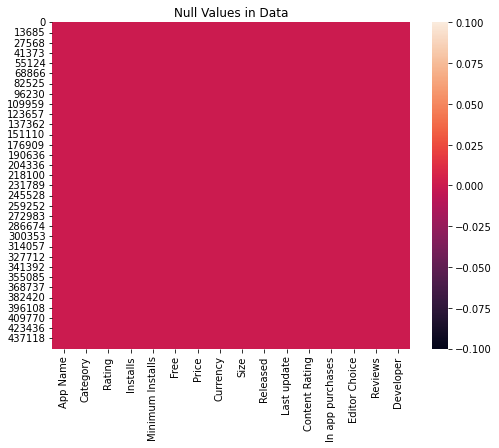

In [29]:
!pip install seaborn
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(Apps_df2.isnull())
plt.title('Null Values in Data')

- From the above Heat Map it is clear that there is no Null value in the dataset after the data cleaning 

In [30]:
len(Apps_df2['App Name'].unique()) # To find the total number of Apps which are unique

391598

In [31]:
boolean = Apps_df2['App Name'].duplicated().any()
boolean

True

In [33]:
Apps_df2['App Name'].value_counts()

Solitaire                                     78
Flashlight                                    68
Gallery                                       64
Music Player                                  56
Sudoku                                        55
                                              ..
BrainwaveX Third Eye Chakra                    1
BrainwaveX Focus Pro                           1
BrainwaveX Study                               1
BrainwaveX Focus                               1
Wholesale Clothing Online wholesale7 Store     1
Name: App Name, Length: 391598, dtype: int64

In [34]:
Apps_df2[Apps_df2['App Name']=='Solitaire']

,App Name,Category,Rating,Installs,Minimum Installs,Free,Price,Currency,Size,Released,Last update,Content Rating,In app purchases,Editor Choice,Reviews,Developer
8138,Solitaire,Card,4.308056,"50,000,000+",50000000.0,TRUE,0.0,USD,46,2013-12-26,2021-05-11,Everyone,False,False,51546.0,Zynga
8714,Solitaire,Card,4.702971,"100,000+",100000.0,TRUE,0.0,USD,35,2020-10-15,2021-04-14,Everyone,True,False,198.0,Gamma Play
16408,Solitaire,Card,4.356895,"1,000,000+",1000000.0,TRUE,0.0,USD,NaN,2015-04-23,2019-09-10,Everyone,True,False,2366.0,BlackLight Studio Games
16617,Solitaire,Card,4.170125,"5,000,000+",5000000.0,TRUE,0.0,USD,26,2017-05-03,2020-10-15,Everyone,False,False,6968.0,Big Cat Studio - we make brain games
17979,Solitaire,Card,4.551285,"1,000,000+",1000000.0,TRUE,0.0,USD,78,2014-04-22,2021-03-25,Everyone,True,False,10503.0,Green Panda Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353767,Solitaire,Card,4.683168,"10,000+",10000.0,TRUE,0.0,USD,14,2020-11-20,2021-04-27,Everyone,False,False,46.0,foo Game Group
380544,Solitaire,Card,4.170000,"10,000+",10000.0,TRUE,0.0,USD,NaN,2015-12-12,2017-01-23,Everyone,False,False,49.0,TLCM free apps & games
384270,Solitaire,Strategy,4.393940,"10,000+",10000.0,TRUE,0.0,USD,16,2019-12-11,2020-01-22,Everyone,False,False,12.0,Apps Specials
432908,Solitaire,Card,4.310000,"100,000+",100000.0,TRUE,0.0,USD,9.2,2016-04-14,2021-04-07,Everyone,False,False,132.0,AppAgency Labs


- **Removing '+' Symbol from the Column 'Installs'**

In [35]:
Apps_df2['Installs'] = Apps_df2['Installs'].map(lambda x: x.rstrip('+'))
Apps_df2['Installs'] = pd.to_numeric(Apps_df2['Installs'].str.replace(',',''))
Apps_df2[:100]


,App Name,Category,Rating,Installs,Minimum Installs,Free,Price,Currency,Size,Released,Last update,Content Rating,In app purchases,Editor Choice,Reviews,Developer
0,Logistics Management,Education,4.090909,10000,10000.0,TRUE,0.0,USD,5.8,2017-07-19,2017-07-19,Everyone,False,False,28.0,eniseistudio
1,Estados Unidos Noticias,News & Magazines,4.000000,1000,1000.0,TRUE,0.0,USD,5.3,2017-05-05,2017-05-05,Everyone,False,False,3.0,eniseistudio
2,Dental Assistant,Education,3.866667,10000,10000.0,TRUE,0.0,USD,5.7,2017-07-18,2017-07-18,Everyone,False,False,3.0,eniseistudio
3,Medical Assistant,Education,4.000000,5000,5000.0,TRUE,0.0,USD,5.8,2017-06-24,2017-06-24,Everyone,False,False,7.0,eniseistudio
4,Business Administration,Education,4.023256,50000,50000.0,TRUE,0.0,USD,5.7,2017-06-13,2017-10-06,Everyone,False,False,29.0,eniseistudio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Teach Your Kids Animal Sounds,Educational,4.250000,10000,10000.0,TRUE,0.0,USD,NaN,2015-05-23,2020-06-18,Everyone,True,False,23.0,Blion Games
96,Vegan Defense,Strategy,4.634783,10000,10000.0,TRUE,0.0,USD,11,2015-03-20,2020-11-03,Everyone,True,False,222.0,Blion Games
97,Carnevale Maschere e Ricette,Entertainment,4.140000,10000,10000.0,TRUE,0.0,USD,NaN,2014-01-26,2020-06-19,Everyone,False,False,14.0,Blion Games
98,La Befana Storie e Leggende,Entertainment,4.080000,10000,10000.0,TRUE,0.0,USD,NaN,2013-12-29,2020-06-20,Everyone,False,False,28.0,Blion Games


### __3. EXPLORATORY DATA ANALYSIS AND VISUALIZATION__

### Columns we are going to Analyze:

1. App Name           
2. Category            
3. Rating              
4. Installs            
5. Minimum Installs    
6. Free                
7. Price               
8. Currency            
9. Size                
10. Released            
11. Last update         
12. Content Rating      
13. In app purchases    
14. Editor Choice       
15. Reviews             
16. Developer           

In [36]:
Apps_df2.describe()

,Rating,Installs,Minimum Installs,Price,Reviews
count,435312.000000,4.353120e+05,4.353120e+05,435312.000000,4.353120e+05
mean,3.000458,8.177479e+05,8.177479e+05,0.313957,4.942956e+03
std,1.867864,2.972976e+07,2.972976e+07,4.122183,1.935479e+05
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,5.000000e+02,5.000000e+02,0.000000,0.000000e+00
50%,3.923850,5.000000e+03,5.000000e+03,0.000000,1.600000e+01
75%,4.386789,5.000000e+04,5.000000e+04,0.000000,1.710000e+02
max,5.000000,5.000000e+09,5.000000e+09,400.000000,5.237720e+07


In [37]:
Apps_df2.Rating.value_counts()

0.000000    114503
5.000000      8116
4.000000      5531
4.500000      3232
4.200000      2766
             ...  
3.615616         1
4.786704         1
4.733766         1
4.707354         1
2.972866         1
Name: Rating, Length: 63456, dtype: int64

In [38]:
Apps_df2['Rating'].describe()

count    435312.000000
mean          3.000458
std           1.867864
min           0.000000
25%           0.000000
50%           3.923850
75%           4.386789
max           5.000000
Name: Rating, dtype: float64

<ipython-input-39-1537e2322562>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(Apps_df2.Rating, color="Blue", shade = True)


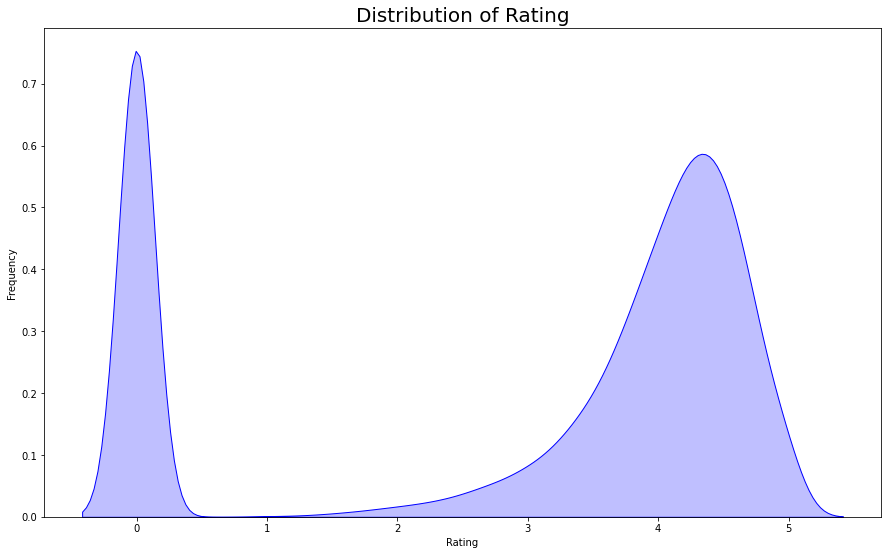

In [39]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(Apps_df2.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

- Zero Ratings are more but majority of such cases might be unrated apps, so we are neglecting the zero ratings and considering other values
- From the distriburion of the Rating it is clear that majority of the Apps are rated from 3 to 5 

### **4. ASKING AND ANSWERING INTERESTING QUESTIONS**


#### QUESTIONS 

1. Which are the Top App Categories in the Google Play Store according to the App count (Top 25)
2. Which are the Top 25 Apps with the most number of intalls by users?   
3. In which year more applications released (No: of apps released yearwise)
4.  Which appication has the 5 star rating (top 25 rated apps)
5. Does the no: of installs increases when the app is free? 
6. Costlier Apps in the play store? (Top 25 costlier Apps)
7.  Applications with more reviews. (Top 25 reviews apps)
8. Which developer has developed most number of apps

### **i) What are the Top 25 App Categories in the Google Play Store according to the App count**

In [40]:
Apps_Category= Apps_df2.Category.value_counts().sort_values(ascending=False).reset_index().rename(columns={'Category':'Count','index':'Category'})
Apps_Category[:25]

,Category,Count
0,Education,45528
1,Tools,32797
2,Personalization,29227
3,Books & Reference,28914
4,Music & Audio,27798
5,Entertainment,21579
6,Lifestyle,18254
7,Business,15807
8,Productivity,14136
9,Health & Fitness,13691


- Ploting a Histogram to find the Top 25 App Category with more App counts 

- Setting up the parameters for the plots

In [41]:
fig=px.histogram(Apps_Category.head(25),
          y='Category',
          x='Count',
          width=900, height=750,
           color='Count')

fig.update_layout(title="Top 25 App Categories",
                 xaxis_title="App Count",
                 yaxis_title="App Category Name",
                 yaxis=dict(tickfont=dict(size=10)))
fig.show()

- From the graph, it is clear that `Education` and `Tools` are the leading App categories with the most apps in the google play store 


- Other Top Categories are Personalization, Books & Reference, Music and Audio and so on as per this visualization

### **ii) Which are the Top 25 Apps with the most intalls by users?**

In [42]:
App_installs=Apps_df2[['App Name','Installs']].sort_values(by = 'Installs', ascending = False)
App_installs[:25]

,App Name,Installs
3555,Google Chrome: Fast & Secure,5000000000
309427,Messenger – Text and Video Chat for Free,5000000000
3558,Google Drive,5000000000
3577,Google,5000000000
3589,Google TV (previously Play Movies & TV),5000000000
3534,Google Photos,5000000000
426216,WhatsApp Messenger,5000000000
3530,YouTube,5000000000
3621,Google Text-to-Speech,5000000000
426237,Messenger – Text and Video Chat for Free,5000000000


In [43]:
fig=px.histogram(App_installs.head(25),
          y='Installs',
          x='App Name',
          width=900, height=750,
           color='Installs')

fig.update_layout(title="Top 25 App Installs",
                 xaxis_title="App Name",
                 yaxis_title="Installation counts",
                 yaxis=dict(tickfont=dict(size=10)))
fig.show()

- While Analysing the most installations in the Google Play store it is found that Messenger and Whatsapp Messenger have the most sum of installs, whereas the Google Applications such as Google Chrome, Google Drive, Google TV and Google Photos are other apps with the most number of installations.



### **iii) In which year more applications released (No: of Apps Vs Released year)**

In [44]:
Apps_df2['Year'] = Apps_df2['Released'].dt.year
Year=Apps_df2.Year.value_counts(ascending=False).reset_index().rename(columns={'Year':'Count','index':'Year'})
Year

,Year,Count
0,2020,89788
1,2019,82558
2,2018,65492
3,2017,55097
4,2016,40910
5,2015,30453
6,2014,23005
7,2013,15155
8,2021,13953
9,2012,10239


In [45]:
fig=px.pie(Year.head(11),
          values='Count',
           names='Year',
           title='Year vs Number of Apps Released'
           )


fig.show()

- From this pie chart it is infered that in the recent years the App counts have been increased to a great extend
- 2020 and 2019 are the years in which the most number of Apps released by the developers with a contribution of 20.7% and 19.1% respectively

### **iv) Which App category from the ‘Content Rating’ column is found more on the Google Play store??**

In [46]:
x2 = Apps_df2['Content Rating'].value_counts().index
y2 = Apps_df2['Content Rating'].value_counts()

x2sis = []
y2sis = []
for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

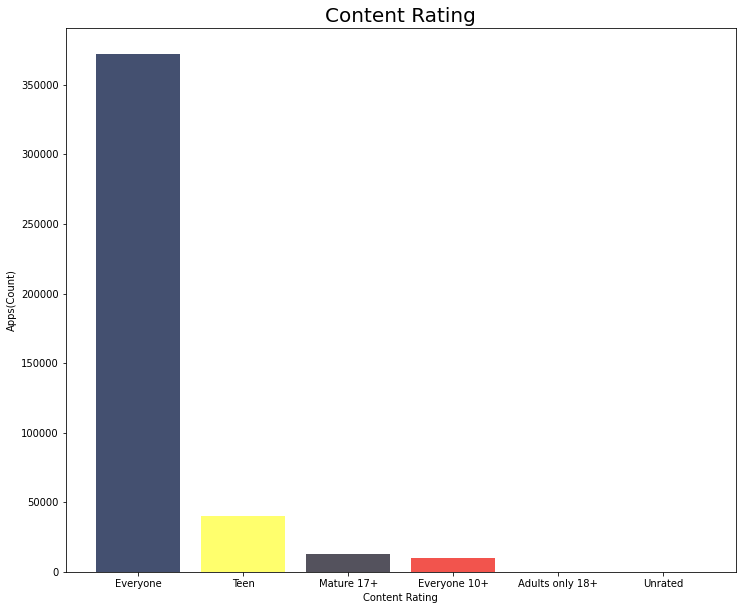

In [47]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

- The `EVERYONE` Category has the highest number of Apps followed by `TEEN CATEGORY` and other Categories under this column.

### **v) The Most Expensive Apps (Top 25 Apps)**

In [48]:
Expensive_df=Apps_df2[['App Name','Price','Currency']].sort_values(by='Price',ascending=False)
Expensive_df[:25]

,App Name,Price,Currency
176103,MESH Connect,400.00,USD
369669,Lullaby Songs,399.99,USD
374827,Series Addict Pro - TV Guide,399.99,USD
105554,Most expensive word game,399.99,USD
125298,Christmas Game VIP,399.99,USD
125297,Quotes Garden VIP,399.99,USD
369656,Premium Luxury Watches - Luxury Watches Brands,399.99,USD
259386,Istanbul theme for Sony Xperia,399.99,USD
403596,Nu Media TV Live,399.99,USD
218757,Plasma duct - Premium Game,399.99,USD


In [49]:
fig=px.histogram(Expensive_df.head(25),
          y='App Name',
          x='Price',
          width=900, height=750,
           color='Price')

fig.update_layout(title="Top 25 Expensive App ",
                 xaxis_title="Price",
                 yaxis_title="App Name",
                 yaxis=dict(tickfont=dict(size=10)))
fig.show()

- From the ploted gragh it is found that the most expensive App is the `Mesh connect` which costs 400$.

- Top 25 Expensive Apps are in the range of 249.99 USD to 400.0 USD


### **vi) Apps achieved the most number of review counts (Top 25 Apps)**

In [50]:
Review=Apps_df2[['App Name','Reviews']].sort_values(by='Reviews',ascending=False)
Review[:25]

,App Name,Reviews
199159,Garena Free Fire - Rampage,52377198.0
426216,WhatsApp Messenger,41525718.0
309406,WhatsApp Messenger,41522824.0
426214,Instagram,39985223.0
309404,Instagram,39981650.0
3530,YouTube,37998715.0
44855,Clash of Clans,22436297.0
426237,Messenger – Text and Video Chat for Free,21987741.0
309427,Messenger – Text and Video Chat for Free,21986907.0
39364,PUBG MOBILE - Traverse,17992452.0


In [51]:
fig=px.pie(Review.head(25),
          values='Reviews',
           names='App Name',
           title='Apps with most Review'
           )


fig.show()

- From the pie chart it is clear that the `Whatsapp Messenger and Instagram` are the Applications with the most number of Reviews recieved from the users.

- This shows the presence of Social media in the modern world.

### **vii) Developers with the most number of Apps developed (Top 25 Developers based on App counts)**

In [52]:
Developers= Apps_df2.Developer.value_counts().sort_values(ascending=False).reset_index().rename(columns={'Developer':'Count','index':'Developer'})
Developers[:25]

,Developer,Count
0,Softecks,339
1,woodenboxlwp,268
2,NUPUIT,253
3,Amino Apps,219
4,livephoto,219
5,Engineering Apps,218
6,Galaxy Production,217
7,Media Catalog,209
8,Media Studio Radio FM,209
9,xoftit,207


In [53]:
fig=px.pie(Developers.head(25),
          values='Count',
           names='Developer',
           title='Developers with most No of Apps'
           ) 


fig.show()

- While analyzing the developers it is found that `Softecks`, `woodenboxlwp` and `NUPUIT` are the Top developers to develop the most number of Applications among other developers and `Intelitech` is in the 25th position in the list

### **viii) Developers with most App Installed in Education Category?**

In [54]:
Edu=Apps_df2[Apps_df2['Category']=='Education'].Developer.tolist()
Apps_df2[Apps_df2['Category']=='Education'].Developer.value_counts().sort_values(ascending=False).reset_index().rename(columns={'Developer':'Count','index':'Developer'})

        

,Developer,Count
0,Softecks,328
1,NUPUIT,249
2,Engineering Apps,211
3,xoftit,206
4,TTMA Apps,201
...,...,...
8393,"Join Our Class, LLC",1
8394,Simon Aschemeier,1
8395,root10,1
8396,nuom,1


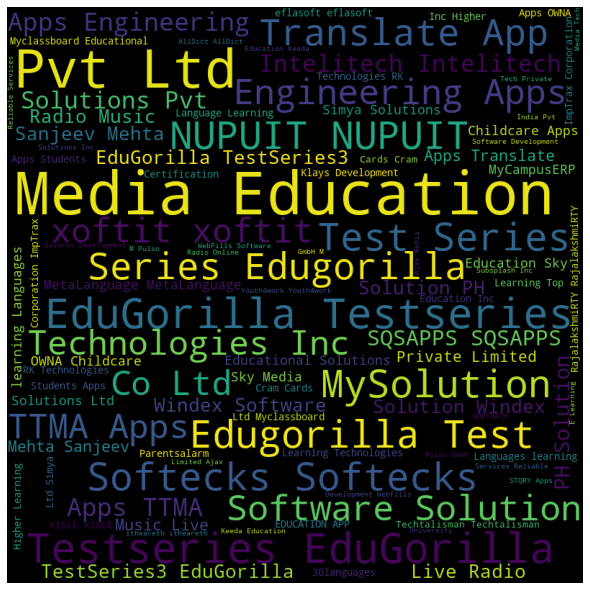

In [55]:
comment_words = ''
stopwords = set(STOPWORDS)
for i in Edu:
  comment_words+="".join(i)+" "
wordcloud=WordCloud(width=800,height=800,
                     background_color='black',
                     min_font_size=10).generate(comment_words)  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()             

- From the above word cloud it is clear that `Media Education`, `SoftecKS` , `Nupuit`,  are the major developers developing Apps related to education and e-Learning

### __5. SUMMARY__

-  Dataset has been downloaded successfully from the online source Kaggle with 4.5 Lakhs+ rows and 29 columns
- Data preparation and cleaning are done on the dataset to analyse and visualize
- Exploratory Analysis and Visualization did on the dataset using the visualization tools
- 8 questions have been asked to the dataset and have found the answers from the visualization.
- Several inferences have been found from the dataset using the Exploratory Data Analysis.  

The following are the insights from the Data.

1. While analysing the categories of apps, most applications in the google play store come under the Education and E-Learning category.

2. After the outbreak of Covid-19 Education Applications and the usage of Apps and installations have increased to a great extent.

3. Most Apps have been released in recent years, particularly during the pandemic period. But it remains almost constant when comparing 2019 and 2020.

4. It is found that the most expensive Apps are in the price range is upto 400$

7. While analysing the review counts it is found that Garena Free Fire - Rampage	(52377198 Reviews), WhatsApp Messenger (41525718 Reviews), Instagram	(39985223 Reviews) and YouTube(37998715 Reviews) are the Apps with the most number of reviews and majority are Social Media platforms.

8. While analyzing the developers it is found that Softecks(339 Apps), woodenboxlwp	(268 Apps) and NUPUIT (253 Apps) are the Top developers to develop the most number of Applications among other developers

### __6. FUTURE WORK__

- Any effect in the installation counts of Apps based on the APP Size to Download/Install?
- Apps with the least rating and Least reviews 
- Same Data Analysis on the Apple play store to analyse the iOS apps and compare the same
- Does the Prize range of the Apps affects the installation or downloading frequency
- Which developer has developed Apps with the highest ratings?
- Does the Rating has a good impact on the installation counts?

### __7. REFERENCES__

1. [Jovian](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn)
2. [Kaggle](https://www.kaggle.com/)
3. [Plotly](https://plotly.com/python/)
4. [geeks for geeks](https://www.geeksforgeeks.org/)
5. [Matplotlib](https://matplotlib.org/)
6. [EDA Project Journey](https://youtu.be/BJF6l2SXFoI])